In [2]:
import os
import sqlite3
import pandas as pd
import seaborn as sns

In [3]:
os.chdir("/Users/nanxiwang/Desktop/Training_final")

In [4]:
con = sqlite3.connect('my_data.db')

In [5]:
condition_data = pd.read_csv("mcondition.csv")
detail_data = pd.read_csv("mdetail.csv")
claims_data = pd.read_csv("mclaims.csv")
target_data = pd.read_csv("Tmembers.csv")


/Users/nanxiwang/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (5,9) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [5]:
condition_data

,cond_key,chronicity,cond_desc,hcc_model_type,cms_model_vers_cd,membership_year,id
0,226,Chronic,"Heart Failure, Except End-Stage and Acute",MEDICAL,V28,2023,993642
1,94,Chronic,Systemic Lupus Erythematosus and Other Specifi...,MEDICAL,V28,2023,993642
2,329,Chronic,"Chronic Kidney Disease, Moderate Stage 3, Exce...",MEDICAL,V28,2023,993642
3,81,Chronic,Ulcerative Colitis,MEDICAL,V28,2023,803124
4,47,Chronic,Disorders of Immunity,MEDICAL,V24,2023,803124
...,...,...,...,...,...,...,...
4009337,37,Chronic,Diabetes with Chronic Complications,MEDICAL,V28,2023,654526
4009338,238,Chronic,Specified Heart Arrhythmias,MEDICAL,V28,2023,654526
4009339,329,Chronic,"Chronic Kidney Disease, Moderate Stage 3, Exce...",MEDICAL,V28,2023,654526
4009340,38,Chronic,"Diabetes with Glycemic, Unspecified, or No Com...",MEDICAL,V28,2023,1124053


In [23]:
#low variance

print(condition_data.var()['cond_key'])
print(condition_data.var()['membership_year'])

#sns.countplot(data=condition_data,x=condition_data['chronicity'])
#sns.countplot(data=condition_data,x=condition_data['cond_desc'])
#sns.countplot(data=condition_data,x=condition_data['hcc_model_type'])
#sns.countplot(data=condition_data,x=condition_data['cms_model_vers_cd'])

#delete membership_year, chronicity

condition_data.drop(columns=['membership_year','chronicity'])

12154.59102134039
0.0


,cond_key,cond_desc,hcc_model_type,cms_model_vers_cd,id
0,226,"Heart Failure, Except End-Stage and Acute",MEDICAL,V28,993642
1,94,Systemic Lupus Erythematosus and Other Specifi...,MEDICAL,V28,993642
2,329,"Chronic Kidney Disease, Moderate Stage 3, Exce...",MEDICAL,V28,993642
3,81,Ulcerative Colitis,MEDICAL,V28,803124
4,47,Disorders of Immunity,MEDICAL,V24,803124
...,...,...,...,...,...
4009337,37,Diabetes with Chronic Complications,MEDICAL,V28,654526
4009338,238,Specified Heart Arrhythmias,MEDICAL,V28,654526
4009339,329,"Chronic Kidney Disease, Moderate Stage 3, Exce...",MEDICAL,V28,654526
4009340,38,"Diabetes with Glycemic, Unspecified, or No Com...",MEDICAL,V28,1124053


In [26]:
#missing value>50%

condition_data.isna().sum(axis=0)

cond_key             0
chronicity           0
cond_desc            0
hcc_model_type       0
cms_model_vers_cd    0
membership_year      0
id                   0
dtype: int64

In [6]:
detail_data

,generic_grouper,unattributed_provider,sex_cd,age,veteran_ind,mco_contract_nbr,plan_benefit_package_id,pbp_segment_id,state_of_residence,county_of_residence,region,race,id
0,Y,N,F,74,N,H5216,72,0,FL,POLK,Florida,NaN,1081255
1,N,N,M,83,N,H5216,334,0,MS,HINDS,Gulf South,BLACK,9020
2,Y,Y,F,68,N,H5216,43,1,TX,GRAYSON,South Central,N AMERICAN NATIVE,1089029
3,N,N,F,66,N,H5216,805,0,AL,HOUSTON,Gulf South,WHITE,872819
4,Y,N,M,74,N,H5216,805,0,TN,SUMNER,Gulf South,WHITE,830574
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1527899,Y,N,M,74,Y,H5216,278,1,MN,ANOKA,Central,NaN,1153850
1527900,N,N,M,78,Y,H5216,255,0,MT,JEFFERSON,Intermountain,WHITE,11169
1527901,N,N,F,72,N,H7617,801,0,SC,CHARLESTON,Southeast,NaN,521682
1527902,N,N,M,80,N,H5216,285,0,OH,MORROW,Midwest,NaN,1556452


<AxesSubplot:xlabel='pbp_segment_id', ylabel='count'>

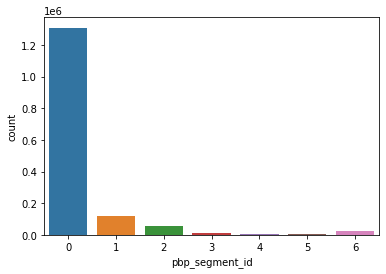

In [6]:
#low variance

#print(detail_data.var()['age'])
#print(detail_data.var()['plan_benefit_package_id'])

#sns.countplot(data=detail_data,x=detail_data['unattributed_provider'])
#sns.countplot(data=detail_data,x=detail_data['veteran_ind'])
#sns.countplot(data=detail_data,x=detail_data['mco_contract_nbr'])
#sns.countplot(data=detail_data,x=detail_data['pbp_segment_id'])
#sns.countplot(data=detail_data,x=detail_data['region'])
#sns.countplot(data=detail_data,x=detail_data['race'])

#delete county of residence?

In [36]:
#missing value>50%

detail_data.isna().sum(axis=0)

generic_grouper               163
unattributed_provider         163
sex_cd                          0
age                             0
veteran_ind                     0
mco_contract_nbr                0
plan_benefit_package_id         0
pbp_segment_id                  0
state_of_residence              0
county_of_residence            29
region                         17
race                       951442
id                              0
dtype: int64

In [7]:
claims_data

,dos_year,clm_unique_key,serv_date_skey,pcp_visit,annual_wellness,humana_paf,preventative_visit,comp_physical_exam,ihwa,fqhc_visit,...,physical_therapist_visit,cardiologist_visit,gastroenterologist_visit,orthopedist_visit,obgyn_visit,nephroloogist_visit,pulmonologist_visit,urgent_care_visit,er_visit,id
0,2021,90000007336,20210105,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,733133
1,2021,90000030533,20210107,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1296887
2,2021,90000039180,20210111,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1331806
3,2021,90000048032,20210112,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1548280
4,2021,90000070091,20210118,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,689644
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19456791,2021,999927000478501203,20210223,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1348185
19456792,2022,999961000483212503,20220608,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,659891
19456793,2022,999962000484641903,20221031,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,724256
19456794,2021,999974100479592803,20210428,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,1314346


In [40]:
#low variance

print(claims_data.var()['dos_year'])

0.24602774263491295


In [39]:
#missing value>50%

claims_data.isna().sum(axis=0)

dos_year                           0
clm_unique_key                     0
serv_date_skey                     0
pcp_visit                   19430584
annual_wellness             19451681
humana_paf                  19454496
preventative_visit          19364041
comp_physical_exam          19409662
ihwa                        19456796
fqhc_visit                  19455906
telehealth                  19383701
endocrinologist_visit       19090430
oncolologist_visit          18778022
radiologist_visit           16527738
podiatrist_visit            18742148
ophthalmologist_visit       17469411
optometrist_visit           18263120
physical_therapist_visit    18259302
cardiologist_visit          15718352
gastroenterologist_visit    18657262
orthopedist_visit           17916813
obgyn_visit                 19128091
nephroloogist_visit         18857286
pulmonologist_visit         18824325
urgent_care_visit           18988991
er_visit                    17157527
id                                 0
d

In [8]:
target_data

,calendar_year,product_type,plan_category,preventive_visit_gap_ind,id
0,2023,LPPO,Medicare Advantage,0,380667
1,2023,LPPO,Medicare Advantage,0,378860
2,2023,LPPO,Medicare Advantage,1,1370287
3,2023,LPPO,Medicare Advantage,0,184540
4,2023,LPPO,Medicare Advantage,0,1628837
...,...,...,...,...,...
1527899,2023,LPPO,Medicare Advantage,1,1065218
1527900,2023,LPPO,Medicare Advantage,1,1597708
1527901,2023,LPPO,Medicare Advantage,1,328428
1527902,2023,LPPO,Medicare Advantage,1,286064


0.0


,preventive_visit_gap_ind,id
0,0,380667
1,0,378860
2,1,1370287
3,0,184540
4,0,1628837
...,...,...
1527899,1,1065218
1527900,1,1597708
1527901,1,328428
1527902,1,286064


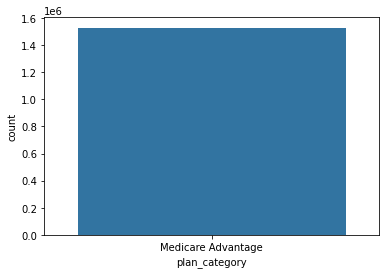

In [44]:
#low variance

print(target_data.var()['calendar_year'])
sns.countplot(data=target_data,x=target_data['plan_category'])

#delete calendar_year, plan_category

target_data.drop(columns=['calendar_year','plan_category','product_type'])